In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df=pd.read_csv('iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score 

<Axes: xlabel='SepalLengthCm', ylabel='Count'>

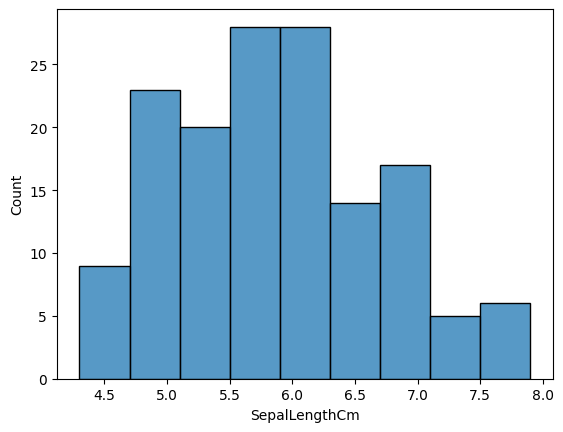

In [23]:
sns.histplot(data=df,x='SepalLengthCm')

<Axes: xlabel='Species', ylabel='count'>

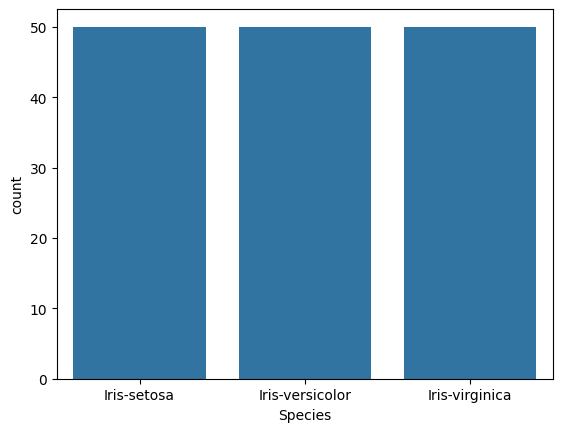

In [24]:
sns.countplot(data=df,x='Species')

<Axes: xlabel='PetalWidthCm', ylabel='count'>

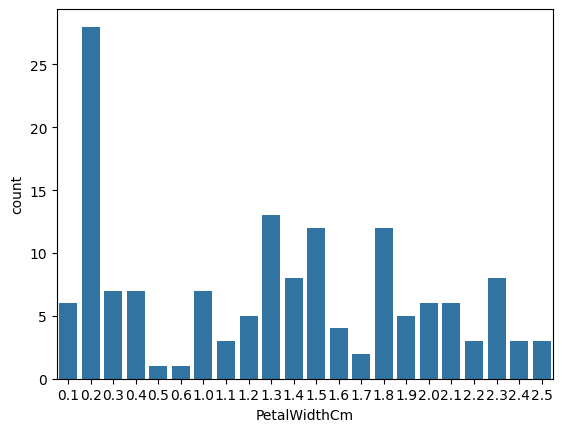

In [25]:
sns.countplot(data=df,x='PetalWidthCm')

<Axes: xlabel='SepalWidthCm'>

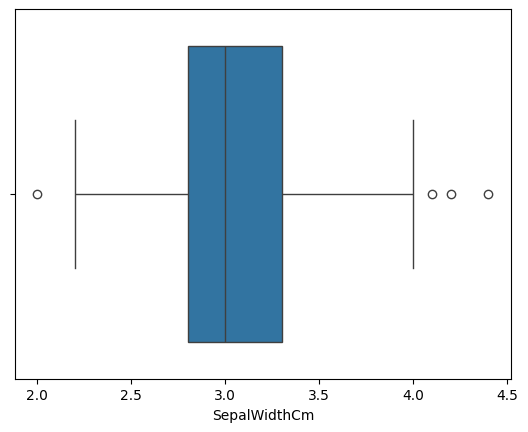

In [26]:
sns.boxplot(data=df,x='SepalWidthCm')

In [27]:
num_iris=df.drop('Species',axis=1)

In [28]:
correlation_matrix=num_iris.corr()

<Axes: >

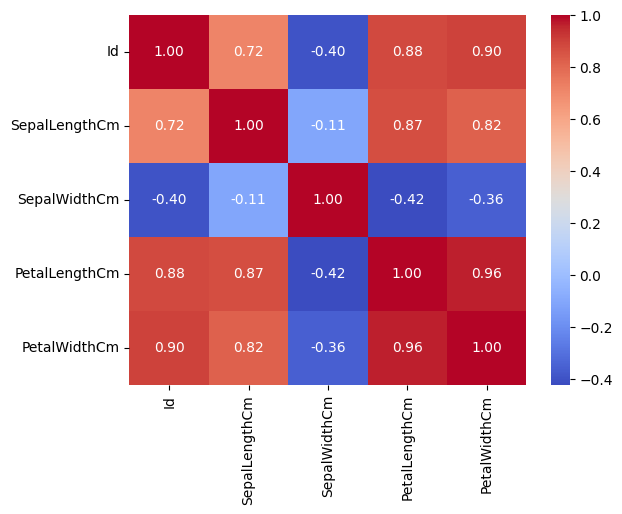

In [29]:
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')

In [30]:
#separating features and target
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)

Accuracy:  1.0


In [32]:
conf_matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ")
print(conf_matrix)

Confusion Matrix: 
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [36]:
train_accuracy = []
test_accuracy = []
values = [i for i in range(1, 10)]

for i in values:
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(X_train, y_train)
    y_pred_test = clf.predict(X_test)
    test_accuracy.append(accuracy_score(y_test, y_pred_test))
    y_pred_train = clf.predict(X_train)
    train_accuracy.append(accuracy_score(y_train, y_pred_train))

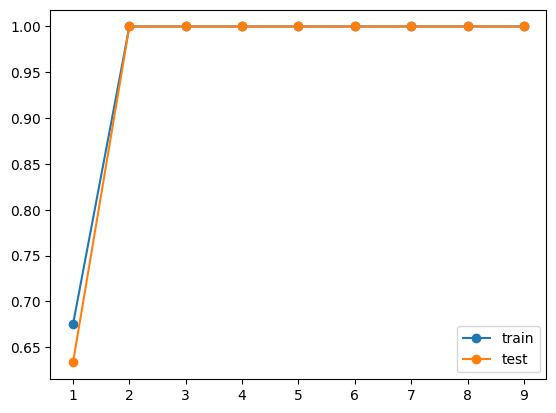

In [37]:
plt.plot(values,train_accuracy,"-o",label="train")
plt.plot(values,test_accuracy,"-o",label="test")
plt.legend()
plt.show()

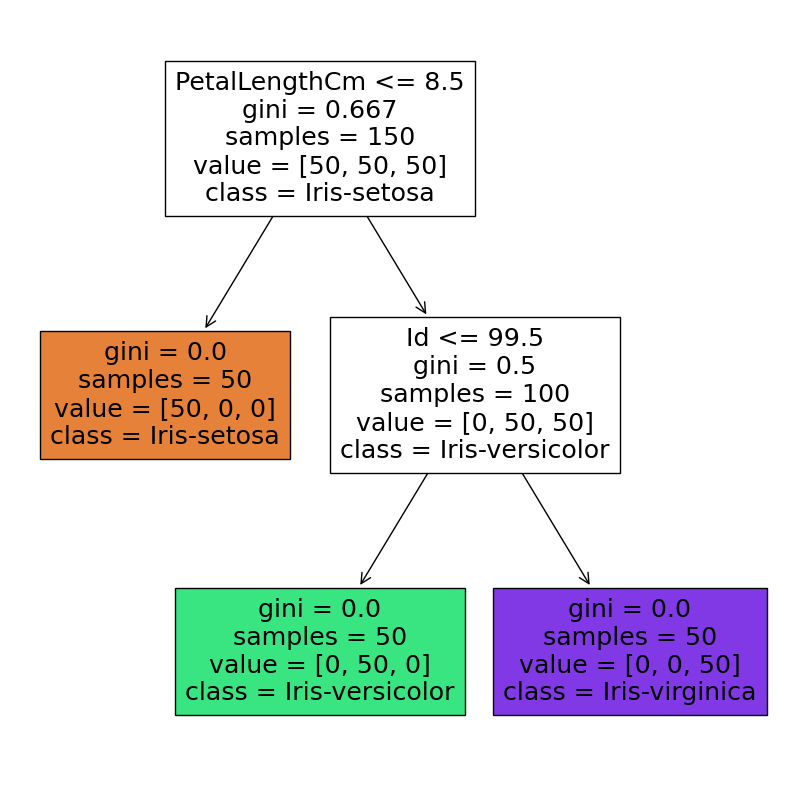

In [41]:
from sklearn import preprocessing
from sklearn.tree import plot_tree

# Apply label encoding
le = preprocessing.LabelEncoder()
df_encoded = df.apply(le.fit_transform)

# Separate features and target variable
X = df_encoded.drop('Species', axis=1)
y = df_encoded['Species']  # Access the target variable directly

# Initialize and fit the DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(10, 10))
plot_tree(clf, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.show()

In [42]:
car=pd.read_csv('carprediction.csv')
car

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [43]:
features=["Year","Engine HP","Engine Cylinders","Number of Doors","highway MPG","city mpg","Popularity"]
X=car[features]
y=car.MSRP
print(X.shape,y.shape)
car.dropna(inplace=True)
y.head()

(11914, 7) (11914,)


0    46135
1    40650
2    36350
3    29450
4    34500
Name: MSRP, dtype: int64

In [58]:
from sklearn.tree import DecisionTreeRegressor
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
train_accuracy=[]
test_accuracy=[]
values=[i for i in range(1,30)]
for i in values:
    reg=DecisionTreeRegressor(max_depth=i)
    reg=reg.fit(X_train,y_train)
    y_pred=reg.predict(X_test)
    test_accuracy.append(reg.score(X_train,y_train))
    y_pred=reg.predict(X_train)
    train_accuracy.append(reg.score(X_test,y_test))

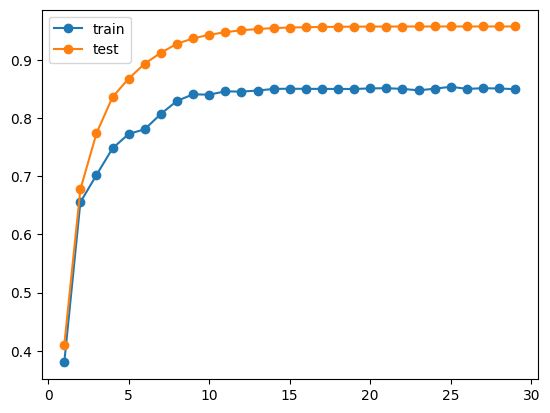

In [59]:
plt.plot(values,train_accuracy,"-o",label="train")
plt.plot(values,test_accuracy,"-o",label="test")
plt.legend()
plt.show()

In [61]:
reg=DecisionTreeRegressor(max_depth=14)
reg=reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
reg.score(X_test,y_test)

0.8504605261984756